# Motivation

In previous notebook we looked at the tasks where NLP in its classical form is not needed. In general, we can classify techniques for NLP into three categories:

1) Rules and heuristics. In principle, regular expressions can also be attributed to them. At the same time, there are special libraries that allow us to do more complex and detailed text processing, still without using Machine Learning

2) Machine Learning. There are many problems where we need to involve advanced ML-techniques (for example, text summarization and generation)

3) Deep Learning. Classical Machine Learning has a number of limitations in the context of working with texts (which we will talk about later). Therefore, we need complex neural network architectures

In this notebook, I want to focus on the first point by looking at popular Python libraries for text processing. We will discuss, for which problems they are applicable, as well as solve some problems with the help of them.

I want to note that in this notebook we will not aim to completely solve the problems or get good quality (we will do this in the following notebooks).

# Important thing before we start

It is worth mentioning that the evaluation of the quality of algorithms in NLP is very often subjective. Therefore, sometimes I will not give evaluative opinions on the work of algorithms, especially in this notebook.

# 1 spaCy

We will start with spaCy library, and after that we will look at other libraries, including NLTK. SpaCy and NLTK are probably two the most popular libraries for text processing. Despite their functionality is approximately the same, there are some differences, which we will talk about later.

SpaCy is an object oriented Python library, which is useful for many types of NLP problems, such as Named Entity Recognition (NER), Sentiment Analysis, Text Classification, and so on (we will go through all these problems).

In [158]:
#! pip install spacy

In [159]:
#! python -m spacy download en

### 1.1 Problem statement

Remember that in the previous notebook we made a function, which splits text into sentences. However, it is far from ideal. Let's see why.

In [191]:
import re
def split_text_to_sentences_modified(text):
    if text == '':
        return 'There is no text'
    return re.split(r'[.!?\n]+', text)

In [192]:
text = '''Mr. Aleksandr decided to explain libraries such as spaCy, NLTK, etc., and he strongly believes that it will be a cool journey.
So let's find out what is the problem with RegEx'''
split_text_to_sentences_modified(text)

['Mr',
 ' Aleksandr decided to explain libraries such as spaCy, NLTK, etc',
 ', and he strongly believes that it will be a cool journey',
 "So let's find out what is the problem with RegEx"]

We see that there are two sentences, but our patterns recognizes four. So, we need a smarted approach to solve a problem.

### 1.2 Apply spaCy

In [193]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for sentence in doc.sents:
  print(sentence)
# now it is done right

Mr. Aleksandr decided to explain libraries such as spaCy, NLTK, etc., and he strongly believes that it will be a cool journey.

So let's find out what is the problem with RegEx


### 1.3 Other application of spaCy

SpaCy is a powerful tool, so we can use it for many more applications. I will provide an example of solving a NER (Named Entity Recognition) task. It helps identify some important entities from text, such as names or dates. This might be useful for automatic processing, for example.

Let's try it with text from Wikipedia:

In [194]:
text = '''The London School of Economics and Political Science (LSE) is a public research university in London, England,
and a member institution of the University of London. Founded in 1895 by Fabian Society members Sidney Webb, Beatrice Webb, Graham Wallas,
and George Bernard Shaw, LSE joined the University of London in 1900 and established its first degree courses under the auspices
of the university in 1901.[6] LSE began awarding its degrees in its own name in 2008,[7] prior to which it awarded degrees of the
University of London. It became a university in its own right within the University of London in 2022.[8]

LSE is located in the London Borough of Camden and Westminster, Central London, near the boundary between Covent Garden
and Holborn. The area is historically known as Clare Market. LSE has more than 11,000 students, just under seventy percent
of whom come from outside the UK, and 3,300 staff.[9] It had an income of £436.9 million in 2021/22, of which £35.5 million was
from research grants.[1] The university has the fifth-largest endowment of any university in the UK. Despite its name, the school
is organised into 25 academic departments and institutes which conduct teaching and
research across a range of pure and applied social sciences.[9]'''

In [195]:
def ner(text):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)
  return [(ent.text, ent.label_) for ent in doc.ents]

In [196]:
ner(text)

[('The London School of Economics and Political Science', 'ORG'),
 ('London', 'GPE'),
 ('England', 'GPE'),
 ('the University of London', 'ORG'),
 ('1895', 'DATE'),
 ('Fabian', 'NORP'),
 ('Society', 'ORG'),
 ('Sidney Webb', 'PERSON'),
 ('Beatrice Webb', 'PERSON'),
 ('Graham Wallas', 'PERSON'),
 ('George Bernard Shaw', 'PERSON'),
 ('the University of London', 'ORG'),
 ('1900', 'DATE'),
 ('first', 'ORDINAL'),
 ('1901.[6', 'CARDINAL'),
 ('2008,[7', 'CARDINAL'),
 ('the \nUniversity of London', 'ORG'),
 ('the University of London', 'ORG'),
 ('2022.[8', 'CARDINAL'),
 ('London Borough', 'GPE'),
 ('Camden', 'GPE'),
 ('Westminster', 'GPE'),
 ('Central London', 'GPE'),
 ('Covent Garden', 'FAC'),
 ('Holborn', 'GPE'),
 ('Clare Market', 'PERSON'),
 ('more than 11,000', 'CARDINAL'),
 ('UK', 'GPE'),
 ('3,300', 'CARDINAL'),
 ('£436.9 million', 'MONEY'),
 ('2021/22', 'CARDINAL'),
 ('£35.5 million', 'MONEY'),
 ('fifth', 'ORDINAL'),
 ('UK', 'GPE'),
 ('25', 'CARDINAL')]

# 2 NLTK

NLTK is probably the most famous Python library for NLP. While spaCy might be more convenient, NLTK is more popular among researchers. Firstly, there is more community support, which is an important factor. Secondly, it gives users more flexibility in choosing tools and algorithms.

In [197]:
#! pip install nltk

### 2.1 Initial problem

Now let's split our text to sentences, but at this time we will use NLTK library.

In [198]:
text = '''Mr. Aleksandr decided to explain libraries such as spaCy, NLTK, etc., and he strongly believes that it will be a cool journey.
So let's find out what is the problem with RegEx'''

In [199]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
from nltk.tokenize import sent_tokenize, word_tokenize

sent_tokenize(text)

['Mr. Aleksandr decided to explain libraries such as spaCy, NLTK, etc., and he strongly believes that it will be a cool journey.',
 "So let's find out what is the problem with RegEx"]

We can also tokenize words (not just sentences).

In [201]:
word_tokenize(text)

['Mr.',
 'Aleksandr',
 'decided',
 'to',
 'explain',
 'libraries',
 'such',
 'as',
 'spaCy',
 ',',
 'NLTK',
 ',',
 'etc.',
 ',',
 'and',
 'he',
 'strongly',
 'believes',
 'that',
 'it',
 'will',
 'be',
 'a',
 'cool',
 'journey',
 '.',
 'So',
 'let',
 "'s",
 'find',
 'out',
 'what',
 'is',
 'the',
 'problem',
 'with',
 'RegEx']

### 2.2 Another application

Sentiment Analysis is a problem where we try to understand the emotional type of text (for example, positive, negative, or neutral). For some reason it is considered as a separate problem (not just multiclass text classification). We can do it using NLTK:

In [202]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def sentiment_analysis(text):

  sia = SentimentIntensityAnalyzer()
  sentiment_scores = sia.polarity_scores(text)
  print("Sentence Overall Rated As", end = " ")
  # decide sentiment as positive, negative and neutral
  if sentiment_scores['compound'] >= 0.05 :
      print("Positive")
  elif sentiment_scores['compound'] <= - 0.05 :
      print("Negative")
  else :
      print("Neutral")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### 2.2.1 Check with simple examples:

In [203]:
text = 'Aleksandr enjoys NLP'

sentiment_analysis(text)

# enjoys is the key word

Sentence Overall Rated As Positive


In [204]:
text = 'Today I went to university to study Machine Learning'

sentiment_analysis(text)

# no emotions, just facts

Sentence Overall Rated As Neutral


In [205]:
text = 'A student could not exit Vim for several hours and it made him frustrated'

sentiment_analysis(text)

# frustrated is the key word

Sentence Overall Rated As Negative


##### 2.2.2 Try with more complicated ones

In [206]:
text = 'Maria loved a boy who rejected her'

sentiment_analysis(text)

Sentence Overall Rated As Positive


In [207]:
text = 'A person won a million dollars, but he is totally indifferent with it'

sentiment_analysis(text)

Sentence Overall Rated As Negative


I ask you to assess the quality of the model based on the texts and results.

### 2.3 SpaCy vs NLTK

SpaCy is object oriented, therefore, more efficient and user-friendly for developers, while NLTK is mainly a string processing library. NLTK provides a variety of algorithms to choose from, while spaCy provides the most efficient algorithm (according to sources I studied). Hence, a common advice is to go with spaCy if you care about results, and to choose NLTK if flexibility is the priority.

# 3 Yake

Yake is a special library designed for the extraction of key words. Unlike two previously mentioned libraries, which can be considered as versatile, this one is very specific.

### 3.1 Problem statement

Let's take the description of one of my GitHub repositories (https://github.com/AlgazinovAleksandr/Deep-Learning-project). There I discuss cases, where it is preferable to use Deep Learning over classical Machine Learning tools. Our goal will be to find 10 most important combinations of words (length of a combination is three at most).

In [208]:
#! pip install yake

In [209]:
text = '''My previous course work was devoted to various optimizers, such as SGD, Adam, and so on. These optimizers are based on
strong prerequisites that are not always fulfilled in the real world. Having studied the applications of these methods,
I learned that despite the violation of many rather important prerequisites in neural network optimization
problems, these optimizers are still used there, and the results are quite good.

After that, I became interested in Deep Learning. This area is quite complex and it is less interpretable than classical
Machine Learning algorithms. Therefore, in this study, I decided to check in which situations the use
of neural networks is preferable, and sometimes even the only option. As a result,
I gave several examples (embeddings, NLP tasks), justifying the conclusions both theoretically and by examples,
including coding. In the end, I wrote some recommendations on how to simplify the task of finding optimal hyperparameters in
optimization problems involving Deep Learning.'''

In [210]:
import yake
def extract_top_phrases(text, language='en', max_phrases=10, max_key_words=3):
    keyword_extractor = yake.KeywordExtractor(lan=language, n=max_key_words, top=max_phrases)
    phrases_with_keywords = keyword_extractor.extract_keywords(text)
    for idx, (phrase, _) in enumerate(phrases_with_keywords, 1):
        print(f"{idx}. {phrase}")

In [211]:
keywords = extract_top_phrases(text)
print(keywords)

1. previous course work
2. work was devoted
3. Deep Learning
4. Adam
5. SGD
6. Machine Learning algorithms
7. optimizers
8. involving Deep Learning
9. classical Machine Learning
10. Learning
None


# 4 Gensim

Gensim is a Python library, designed for representing documents as semantic vectors. The goal is to convert texts into numerical vectors (embeddings), such that similar texts will have similar vectors. There are many ways it can be done, and it is a topic for a separate discussion (our next notebook will be partially dedicated to it).

### 4.1 Problem statement

I do not want to solve Machine Learning problems here, such as text classification. That is why I suggest comparing similarities of different texts. The feature is that we will know, which texts are similar, and which are not. Hence, we will be able to compare the model results with the truth.

### 4.2 Briefly about text embeddings

Embedding is a mapping of an arbitrary object to a fixed-size vector. There are many ways to do this. When we talk about word representations, there are both very simple and intuitive methods, such as bag of words, and complex methods, involving the use of neural network architectures. Usually, the latter methods give better results. Now we will use one of them (doc2vec).

### 4.3 Generate data

Since we are solving AI problems, let's use AI tools to generate data. I asked GPT to give me text based on the prompt: 'Take a text "Data Scientist with three years of experience. Good knowledge of NLP and Time Series. Have a specialized education and basic knowledge of MLOps, as well as a love for board games. Also interested in research and write articles for scientific journals". Based on the text and your understanding of AI, generate 9 more texts. 3 of them must be similar to the initial one, 3 other - kind of related to it, while the last 3 should be about different things, but not too abstract'.

### 4.4 Solving problem

We will create embeddings and calculate the cosine similarity between vectors, identifying, which texts, according to model, are close to each other, and which are not.

In [212]:
#! pip install gensim

In [213]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

def get_document_embeddings(documents):
    tagged_data = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(documents)]
    model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
    embeddings = np.array([model.docvecs[str(i)] for i in range(len(documents))])
    return embeddings

def calculate_cosine_similarity(embeddings):
    similarity_matrix = cosine_similarity(embeddings)
    return similarity_matrix

def plot_similarity_matrix(similarity_matrix, documents):
    labels = [doc.split()[0] + "..." for doc in documents]
    plt.gcf().set_size_inches(16, 9)
    sns.heatmap(similarity_matrix, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels, cmap="cividis")
    plt.title("Similarity Matrix")
    plt.xlabel("Docs")
    plt.ylabel("Docs")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()

In [214]:
documents = ["Data Scientist with three years of experience. Good knowledge of NLP and Time Series. Have a specialized education and basic knowledge of MLOps, as well as a love for board games. Also interested in research and write articles for scientific journals.",
    "Experienced Data Scientist proficient in NLP and Time Series. Skilled in MLOps and passionate about board games. Love writing articles for scientific journals and conducting research.",
    "Data Scientist with a strong background in NLP and Time Series. Possess specialized education and extensive experience in MLOps. Enjoys playing board games and loves contributing to scientific journals.",
    "Seeking a Data Scientist role with three years of experience in NLP and Time Series. Excels in MLOps and has a keen interest in board games and scientific research.",
    "Software Engineer with expertise in Computer Vision and Machine Learning. Knowledgeable in Natural Language Processing and Time Series analysis. Enjoys playing board games during leisure time.",
    "AI Researcher with a focus on Reinforcement Learning and Deep Learning. Interested in exploring NLP techniques and Time Series forecasting. Enjoys participating in board game competitions.",
    "Data Analyst with skills in Data Visualization and Statistical Analysis. Looking to learn more about NLP and Time Series. Enjoys leisure time playing board games with friends.",
    "Marketing Specialist with a passion for consumer behavior analysis. Proficient in social media campaigns and content creation. Enjoys reading books on psychology and writing travel blogs.",
    "Environmental Scientist dedicated to researching climate change impacts. Specialized in GIS and remote sensing. Enjoys hiking and birdwatching during weekends.",
    "Financial Analyst with expertise in risk assessment and portfolio management. Skilled in financial modeling and data analysis. Enjoys watching documentaries on history and ancient civilizations."
]
embeddings = get_document_embeddings(documents)

<ipython-input-213-62b753cac554>:14: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  embeddings = np.array([model.docvecs[str(i)] for i in range(len(documents))])


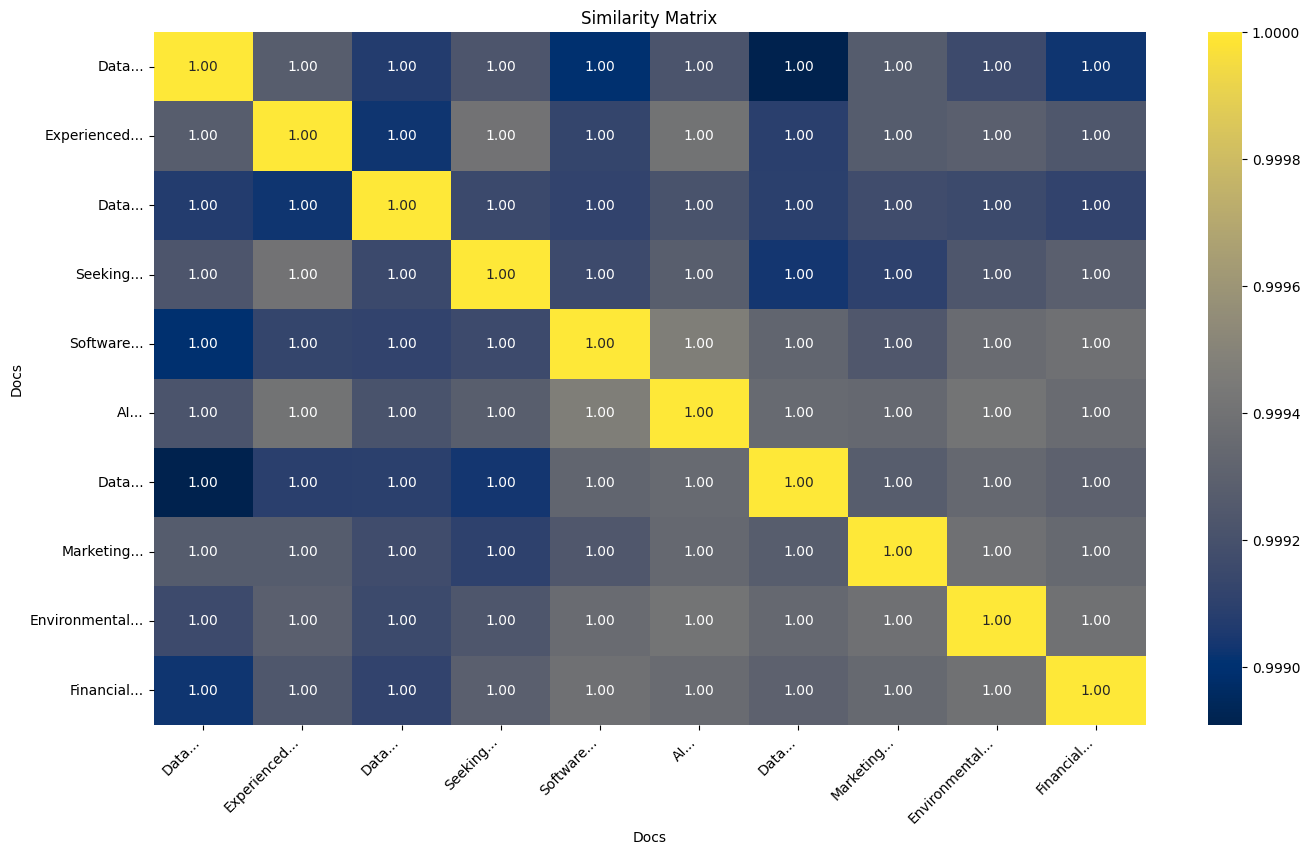

In [215]:
similarity_matrix = calculate_cosine_similarity(embeddings)
plot_similarity_matrix(similarity_matrix, documents)

In [216]:
similarity_matrix

array([[1.0000002 , 0.9992727 , 0.99906725, 0.99922717, 0.9989895 ,
        0.9992187 , 0.99890846, 0.99926335, 0.99915874, 0.9990268 ],
       [0.9992727 , 1.        , 0.9990264 , 0.9994002 , 0.9991242 ,
        0.99940675, 0.9990913 , 0.99926466, 0.99928707, 0.9992342 ],
       [0.99906725, 0.9990264 , 0.99999994, 0.99914986, 0.9991149 ,
        0.9992079 , 0.99909186, 0.9991717 , 0.9991551 , 0.99911624],
       [0.99922717, 0.9994002 , 0.99914986, 1.0000002 , 0.99915826,
        0.99927706, 0.99903274, 0.9991041 , 0.9992295 , 0.9992845 ],
       [0.9989895 , 0.9991242 , 0.9991149 , 0.99915826, 0.9999998 ,
        0.9994682 , 0.9993217 , 0.9992387 , 0.9993601 , 0.99938947],
       [0.9992187 , 0.99940675, 0.9992079 , 0.99927706, 0.9994682 ,
        1.0000001 , 0.99935067, 0.99934345, 0.9994088 , 0.9993579 ],
       [0.99890846, 0.9990913 , 0.99909186, 0.99903274, 0.9993217 ,
        0.99935067, 0.9999998 , 0.9992725 , 0.999342  , 0.9992993 ],
       [0.99926335, 0.99926466, 0.9991717

**We see that there is a problem. Values are very high and are too close to each other, hence it is impossible to perform the analysis. Based on my experience, this is a common problem with cosine similarity. That is why I suggest to calculate the euclidean distances, and to map them in the range from 0 to 1, such that 1 is perfectly close, and 0 means no similarity at all.**

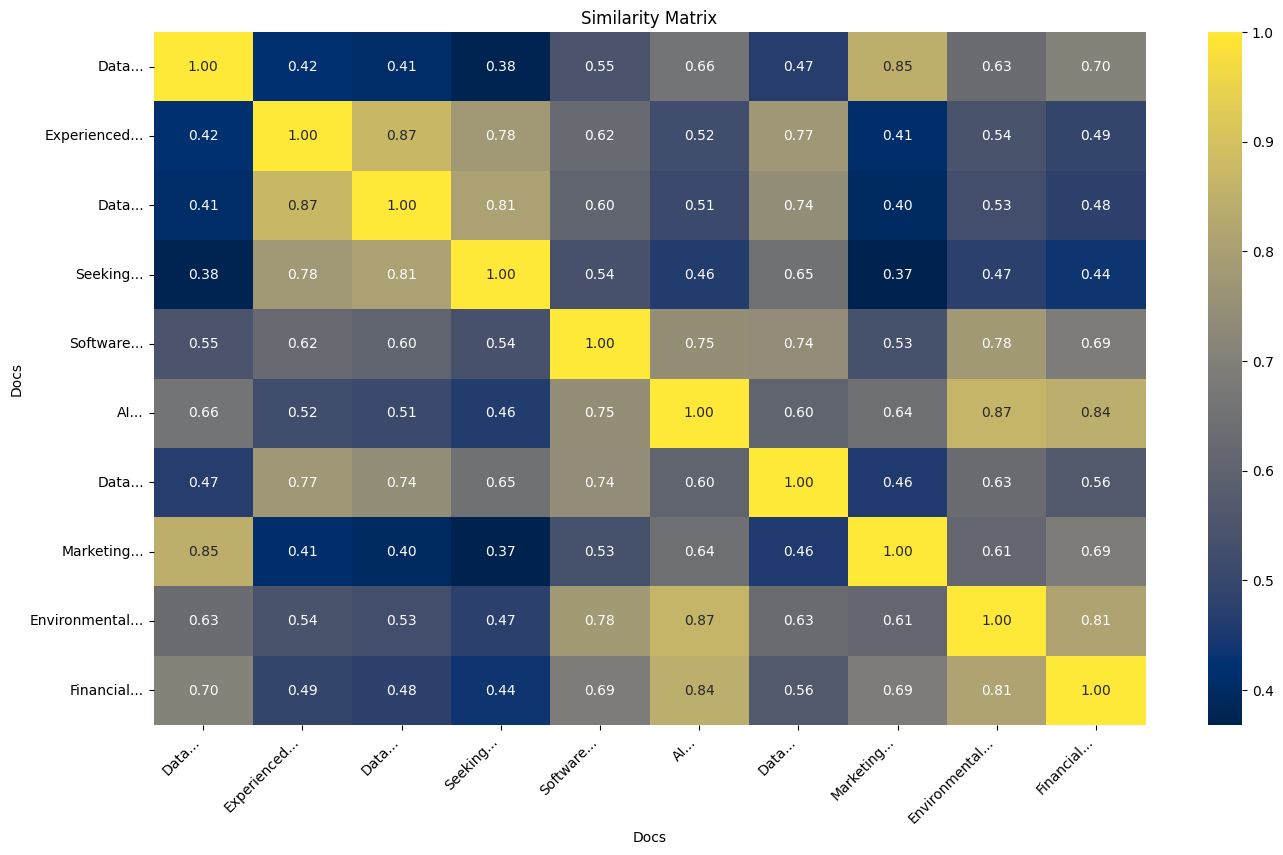

In [217]:
# try euclidean similarity
def calculate_euclidean_similarity(embeddings):
    distance_matrix = euclidean_distances(embeddings)
    normalized_distance_matrix = 1 / (1 + distance_matrix)
    return normalized_distance_matrix

similarity_matrix = calculate_euclidean_similarity(embeddings)
plot_similarity_matrix(similarity_matrix, documents)

**The results are bad. We see that last three texts, according to a matrix, are closer to the base one than the first three. However, data was designed in an opposite way. I believe the problem cannot be with the euclidean distance. I guess the change of the way of constructing embeddings might be a solution. We will do this in the next notebook, as well as discuss ways to calculate similarities and make embeddiings.**

# Conclusion

As we can see, in NLP there are a lot of tasks and ways to solve them. On the one hand, this has led to the creation of a large number of tools and methods. On the other hand, some tasks are quite complex, and it is rather difficult to understand what methods can be used to solve them well, and whether it is possible at all.

# References

https://www.youtube.com/watch?v=h2kBNEShsiE&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=7 - a good video and a good course for begginers in NLP

https://spacy.io/ - spaCy Python library documentation

https://www.freecodecamp.org/news/getting-started-with-nlp-using-spacy/ - good source for spaCy library

https://www.nltk.org/ - NLTK documentation

https://realpython.com/nltk-nlp-python/ - good source for NLTK

https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ - for sentiment analysis

https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5 - about doc2vec

https://radimrehurek.com/gensim/models/doc2vec.html - one more source about doc2vec